# C4021 - Group 4.2 
## Project work Weeks 7-9
### Participants

| Student Name   |   Id    |
|----------|:-------------:|
| Michel DANJOU |  18263461 |
| Brian PARLE | |
| Gerry KERLEY | |
| Gana SUBRAMANIAN | |


## Machine Learning Algorithm: Baysian Classifier
Source: http://scikit-learn.org/stable/modules/naive_bayes.html


## Dataset Information
### Iris dataset
http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

### Nasa dataset

_Source:_ https://www.kaggle.com/shrutimehta/nasa-asteroids-classification (source: Shruti Mehta)

**Content**
The data is about Asteroids - NeoWs. NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

**Acknowledgements**
Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

**Inspiration**
Finding potential hazardous and non-hazardous asteroids
Features responsible for claiming an asteroid to be hazardous

## Notebook Structure
1. Source Code
1. Iris dataset
    1. Data Loading and Pre-processing
    1. Model training and testing
    1. Model graphing
    1. Model analysis: further eaxamination of significant features etc.
1. Nasa dataset 
    1. Data Loading and Pre-processing
    1. Model training and testing
    1. Model graphing
    1. Model analysis: further eaxamination of significant features etc.


## Team Contributions:
**Training data**
  * Iris dataset: Michel Danjou
  * Nasa dataset: reused Brian Parle's code

**Pre-processing**
  * Iris dataset: Michel Danjou
  * Nasa dataset: reused Brian Parle's code

**Algorithm training and evaluation**
  * Michel Danjou

**Visualisation of outputs**
  * Michel Danjou


# Data loading

In [71]:
%reset
%matplotlib inline
%config IPCompleter.greedy=True

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import enum 

df = pd.read_csv('nasa.csv')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Preprocessing

## Removing low information columns
See the Random Forrest notebook from Brian Parle for details
regarding the cleaning up of the nasa dataset and more particularly
the removal of low information columns

In [72]:
df = df.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)'], axis=1)
df = df.drop(['Close Approach Date'], axis=1)
df = df.drop(['Orbiting Body'], axis=1)
df = df.drop(['Orbit Determination Date'], axis=1)
df = df.drop(['Equinox'], axis=1)

# Handling Outliers
Ploting the columns of the dataset to identify outliers


Feature name: Neo Reference ID


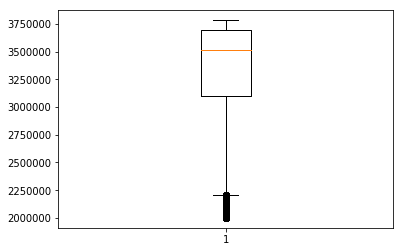


Feature name: Name


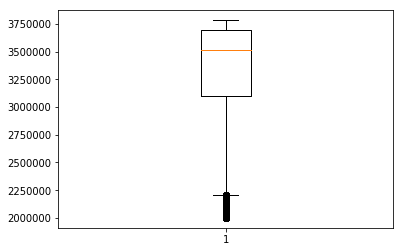


Feature name: Absolute Magnitude


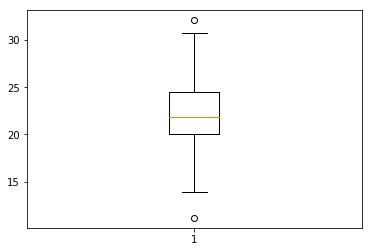


Feature name: Est Dia in M(min)


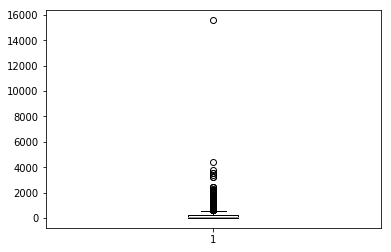


Feature name: Est Dia in M(max)


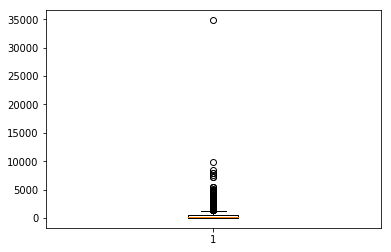


Feature name: Epoch Date Close Approach


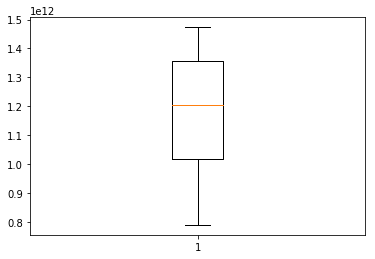


Feature name: Relative Velocity km per sec


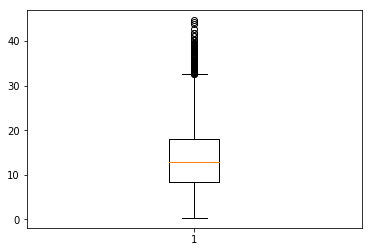


Feature name: Relative Velocity km per hr


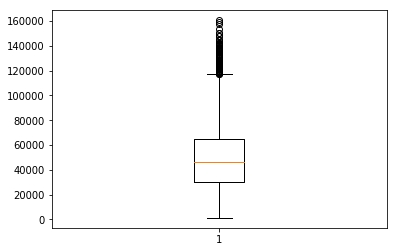


Feature name: Miles per hour


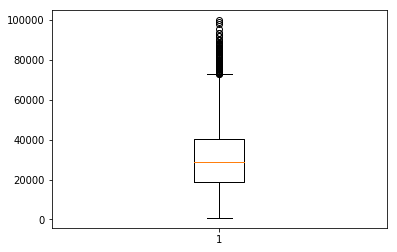


Feature name: Miss Dist.(Astronomical)


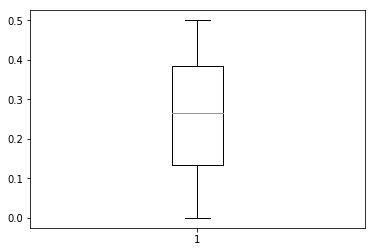


Feature name: Miss Dist.(lunar)


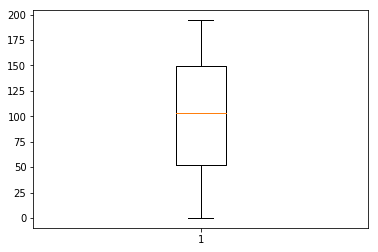


Feature name: Miss Dist.(kilometers)


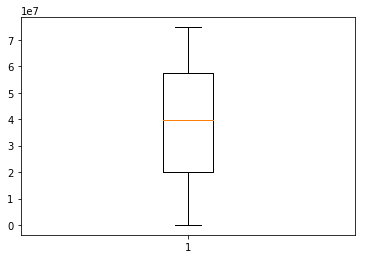


Feature name: Miss Dist.(miles)


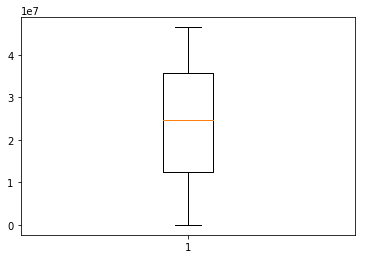


Feature name: Orbit ID


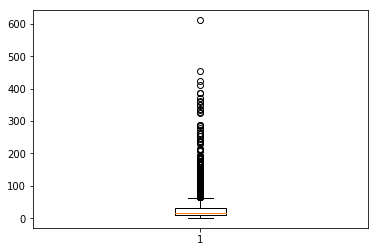


Feature name: Orbit Uncertainity


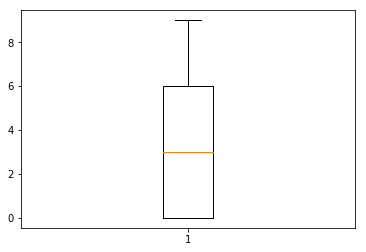


Feature name: Minimum Orbit Intersection


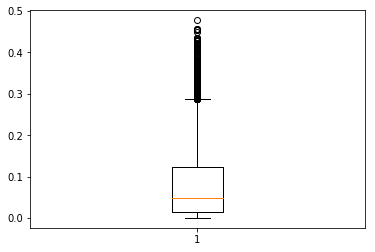


Feature name: Jupiter Tisserand Invariant


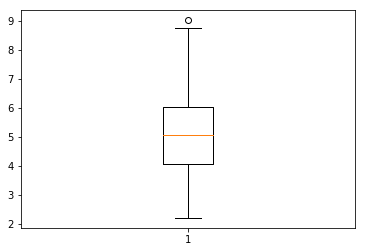


Feature name: Epoch Osculation


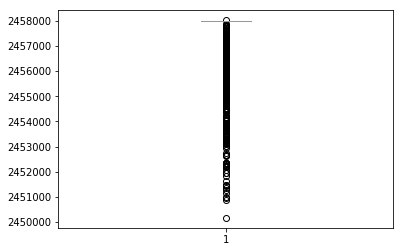


Feature name: Eccentricity


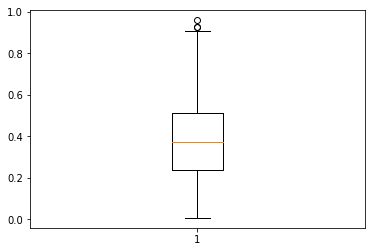


Feature name: Semi Major Axis


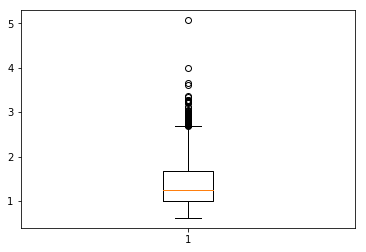


Feature name: Inclination


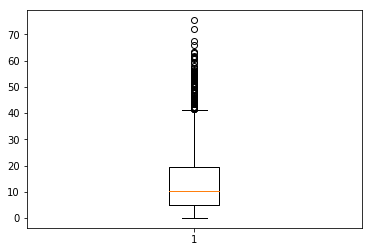


Feature name: Asc Node Longitude


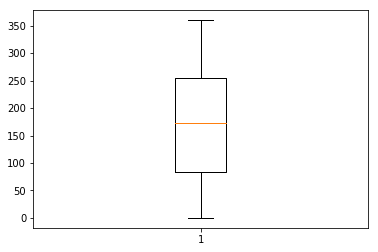


Feature name: Orbital Period


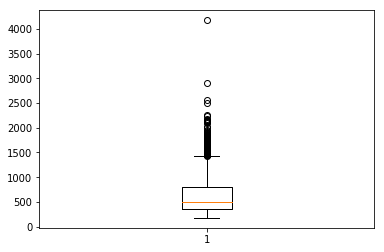


Feature name: Perihelion Distance


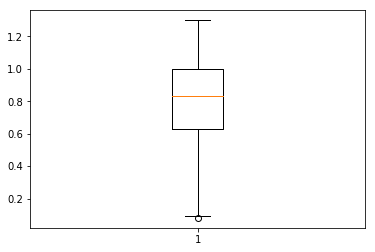


Feature name: Perihelion Arg


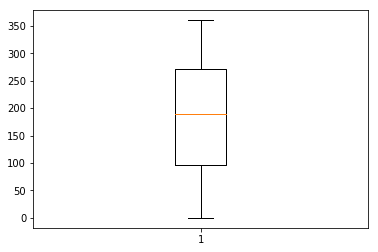


Feature name: Aphelion Dist


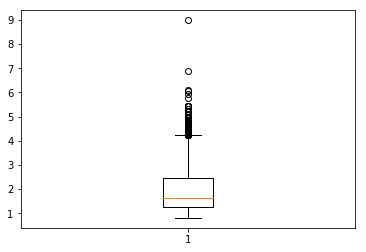


Feature name: Perihelion Time


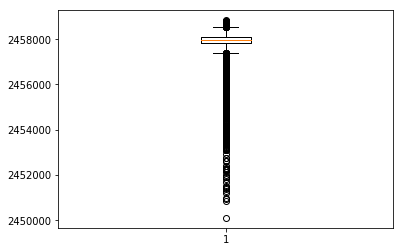


Feature name: Mean Anomaly


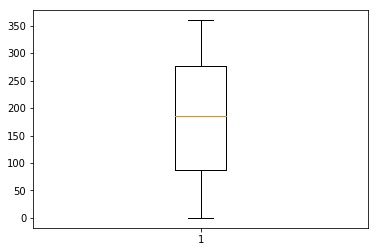


Feature name: Mean Motion


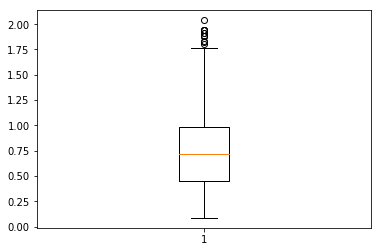

In [74]:
feature_names = df.dtypes.index[:-1]
target_names = df.dtypes.index[-1]

for i in range(0, len(feature_names)):
    print("\nFeature name:", feature_names[i])
    plt.boxplot(df[feature_names[i]])
    plt.show()
    

## Separating features and labels

In [75]:
data = df.iloc[:, :-1].values # Drop the last column
target = df.iloc[:,-1].values # Keep the last column

print("Feature names:", feature_names)
print("Target names :", target_names)

print("\nFeature shape:", data.shape)
print("Target shape :", target.shape)

Feature names: Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in M(min)',
       'Est Dia in M(max)', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')
Target names : Hazardous

Feature shape: (4687, 29)
Target shape : (4687,)


## Scale the data
We are curious to see the impact of Scaling on the results of the Baysian classifier. This is why we have a function that can perform either: Standard scaler, Min max scaler or no scaler.

For now we call scale_data() with Scaler.NONE as a parameter. Later on we will run it again with different params and compare.

In [76]:
class Scaler(enum.Enum):
    STANDARD_SCALER = 1
    MIN_MAX = 2
    NONE = 3
    
    
def scale_data(scaler_name, data):
    """
    Normalising the data. 2 normalisations supported
        Standard_scaler: normalised values have a mean of 0 and std. dev. of 1
        Min max scaler: normalised values are between 0 and 1            
    """

    print("Scaler:", scaler_name)
    
    if scaler_name is Scaler.STANDARD_SCALER:
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
            
    elif scaler_name is Scaler.MIN_MAX:
        scaler = MinMaxScaler()
        scaler.fit(data)
        data = scaler.transform(data)
            
    elif scaler_name is Scaler.NONE:
        pass
    
    return data

scaler_name = Scaler.NONE    
data = scale_data(scaler_name, data)


Scaler: Scaler.NONE


# Reduce dimensionality

In [77]:
def reduce_dimensionalities(nb_components, data):
    """
    Perform Primary Component Analysis on the dataset.
    Source: https://www.youtube.com/watch?v=IvvPPKDRJqE
    """
        
    # If nb_components == 0 then no PCA transformation is done.
    if nb_components == 0:
        print("No PCA done")
        return
    
    print("PCA nb_components:", nb_components)
    pca = PCA(nb_components)
    data = pca.fit_transform(data)
    

nb_components = 0
reduce_dimensionalities(nb_components, data)

No PCA done


## Split between training and testing data

In [78]:
training_vs_testing_ratio = 0.7

nb_rows, nb_cols = np.shape(data)
nb_training_rows = (int)(nb_rows * training_vs_testing_ratio)
nb_test_rows = nb_rows - nb_training_rows

training_dataset = data[:nb_training_rows, ]
testing_dataset = data[nb_training_rows:,]

training_labels = target[:nb_training_rows, ]
testing_labels = target[nb_training_rows:, ]

print("training_dataset shape:{}",training_dataset.shape)            
print("testing_dataset shape :{}",testing_dataset.shape)

print("\ntraining_labels shape :{}",training_labels.shape)
print("testing_labels shape  :{}",testing_labels.shape)

print("\ntesting_labels        :{}",testing_labels)


training_dataset shape:{} (3280, 29)
testing_dataset shape :{} (1407, 29)

training_labels shape :{} (3280,)
testing_labels shape  :{} (1407,)

testing_labels        :{} [False False False ... False False False]


# Algorithm training and evaluation

## Training

In [79]:
gnb = GaussianNB()            
gnb.fit(training_dataset, training_labels)


GaussianNB(priors=None)

## Testing the estimator accuracy

In [80]:
results = gnb.predict(testing_dataset)
score = gnb.score(testing_dataset, testing_labels, sample_weight=None)

# Check for errors
error_features = []
error_labels = []
error_index = []

np_error_features = []

for i in range(0, nb_test_rows):
    if results[i] != testing_labels[i]:
        error_features.append(testing_dataset[i, :].tolist())
        error_labels.append(results[i])
        error_index.append(i)

        print("Index:{}, incorrect match for:{}, expected label:{}, actual label:{}".format(i, testing_dataset[i], testing_labels[i], results[i]))

        # Convert the list to a np.array so that we can slice it at step 5 for plotting.
        np_error_features = np.array(error_features)

        # Metrics
        error_percentage =  (len(error_index) / nb_test_rows) * 100
        accuracy_percentage = 100 - error_percentage 
        
print("="*80)
print("Scaler           :", scaler_name)
print("PCA nb_components:", nb_components)
print("% Error          :", error_percentage)
print("% Accuracy       :", accuracy_percentage)            
print("Score            :", score)



Index:18, incorrect match for:[3.50814600e+06 3.50814600e+06 2.17000000e+01 1.21494041e+02
 2.71668934e+02 1.33119360e+12 1.96848497e+01 7.08654588e+04
 4.40330402e+04 2.13339266e-01 8.29889755e+01 3.19151000e+07
 1.98311240e+07 1.50000000e+01 1.00000000e+00 1.75511000e-02
 3.95200000e+00 2.45800050e+06 7.45749507e-01 1.61280893e+00
 1.19339006e+01 1.54496274e+02 7.48122656e+02 4.10057466e-01
 1.16760831e+02 2.81556040e+00 2.45829015e+06 2.20618175e+02
 4.81204515e-01], expected label:True, actual label:False
Index:27, incorrect match for:[2.20739800e+06 2.20739800e+06 2.04000000e+01 2.21082810e+02
 4.94356193e+02 1.33179480e+12 1.28798146e+01 4.63673327e+04
 2.88108574e+04 2.05446296e-01 7.99186096e+01 3.07343300e+07
 1.90974280e+07 7.10000000e+01 0.00000000e+00 1.02349000e-02
 3.46000000e+00 2.45800050e+06 6.39082741e-01 2.09341464e+00
 2.59318667e+00 1.25987924e+02 1.10632140e+03 7.55549474e-01
 7.95709238e+01 3.43127980e+00 2.45823489e+06 2.83728329e+02
 3.25402728e-01], expected l

## Cross validation
Sources:
  * https://stackoverflow.com/questions/16379313/how-to-use-the-a-k-fold-cross-validation-in-scikit-with-naive-bayes-classifier-a
  * http://scikit-learn.org/stable/modules/cross_validation.html
  * https://www.youtube.com/watch?v=L_dQrZZjGDg
        
        
With Cross Validation, the data are split between training and testing data in a random way. 
This limits the bias that might be present in the dataset.

In [90]:
def do_cross_validation(data, target):
    cv = ShuffleSplit(n_splits=25, test_size=0.3, random_state=0)
    gaussian_nb = GaussianNB()            

    scores = cross_val_score(gaussian_nb, data, target, cv=cv) 
    print("Scores", scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    return scores

scores = do_cross_validation(data, target)


Scores [0.83937456 0.83653163 0.84221748 0.82658138 0.83511016 0.85429993
 0.83297797 0.84008529 0.84150675 0.84150675 0.82871357 0.83653163
 0.84363895 0.84434968 0.85856432 0.83439943 0.83511016 0.84221748
 0.8336887  0.84790334 0.8315565  0.84150675 0.84008529 0.84719261
 0.85643213]
Accuracy: 0.84 (+/- 0.02)


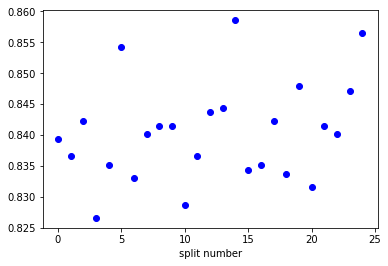

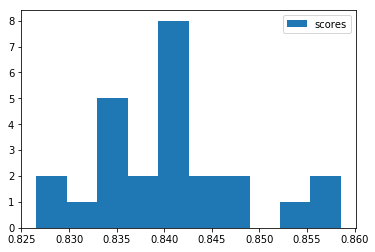

In [94]:
plt.plot(scores, 'bo')
#plt.plot(scores, scores.mean(), label='Mean', linestyle='--')
plt.xlabel("Gaussian score")
plt.xlabel("split number")
plt.show()

plt.hist([scores], label=['scores'])
plt.legend(loc='upper right')
plt.show()

## Changing parameters to improve the accuracy of estimator

### Using a scaler

In [86]:
scaler_name = Scaler.MIN_MAX    

data_mean = np.mean(data)
print("data mean:", data_mean)

scaled_data = scale_data(scaler_name, data)

scaled_data_mean = np.mean(data)
print("data mean:", scaled_data_mean)


data mean: 40688083121.86309
Scaler: Scaler.MIN_MAX
data mean: 40688083121.86309


In [89]:
score_with_scaler = do_cross_validation(scaled_data, target)

Scores [0.93745558 0.9246624  0.92892679 0.91755508 0.92039801 0.91826581
 0.92181947 0.92963753 0.92892679 0.93958778 0.92750533 0.91044776
 0.93532338 0.91826581 0.93319119 0.92821606 0.91613362 0.91684435
 0.92821606 0.93390192 0.9246624  0.93390192 0.92253021 0.93248045
 0.93816631]
Accuracy: 0.93 (+/- 0.02)


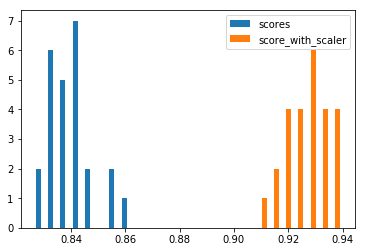

In [92]:
plt.hist([scores, score_with_scaler], 25, label=['scores', 'score_with_scaler'])
plt.legend(loc='upper right')
plt.show()

### Using Primary Component Analysis
TODO: Move class code into Notebook
TODO: Add diagrams

# TODO list
  * Show that using the PCA degrades the accuracy of estimator
  * Provide more visualisations
